# Day 2 - Data Science Essentials Program
NAMR - Apr 2024

**Agenda for today**
- Morning - Visualizations:
    - pandas
    - matplotlib
    - seaborn
    - plotly
- Afternoon - Linear Regressions:
    - simple example with students hours data set
    - finance example with Beta of Apple vs. SP500 (CAPM)
    - multi-variate example with Famfa French 3 Factor model
 
**Before we get started**
- open up the `Visualizations Examples.ipynb` file
- in a new notes file, copy and try the import codes below

In [4]:
import pandas as pd  #quick graphs, simple types of charts (hist, bar, scatter, line)
import matplotlib.pyplot as plt #used to customize the graphs (Adding legends, titles, dotted lines, etc.)
import seaborn as sns # "fast-food" version of matplotib
import plotly.express as px #interactive graphs
            #you can export the graph as html file

In [5]:
sp500 = pd.read_csv("StockData/SP500.csv", parse_dates=['Date'], index_col=['Date'], date_format="%m/%d/%y")
aapl = pd.read_csv("StockData/aapl.csv", parse_dates=['Date'], index_col=['Date'], date_format="%m/%d/%y")

In [6]:
#calculate daily returns
sp500['Returns'] = sp500['Close'].pct_change()
aapl['Returns'] = aapl['Close'].pct_change()

## Graphing with Pandas
- table.plot(x, y, kind="graphtype") - line chart by default
- table[column].plot(kind="type") - will use index as the x-axis by default

<Axes: xlabel='Open', ylabel='Close'>

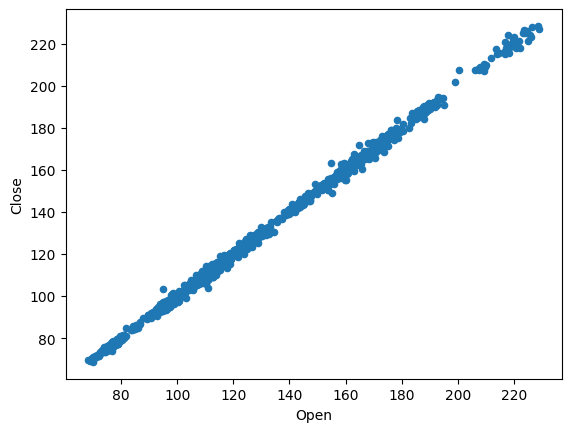

In [23]:
aapl.plot(x='Open', y='Close', kind='scatter')

<Axes: xlabel='Date'>

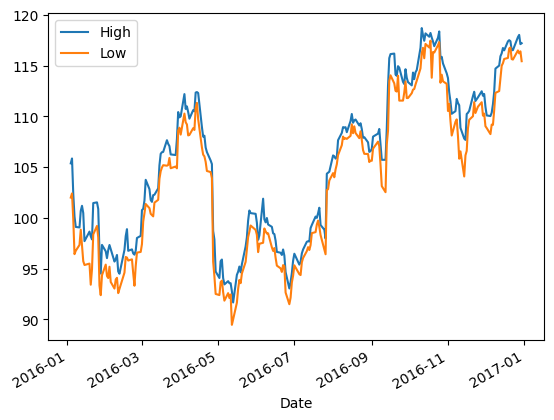

In [22]:
# aapl['Close'].plot()
# sp500['Close'].plot()
aapl.loc['2016'][['High','Low']].plot()

<Axes: title={'center': 'Histogram of Apple Returns'}, ylabel='Frequency'>

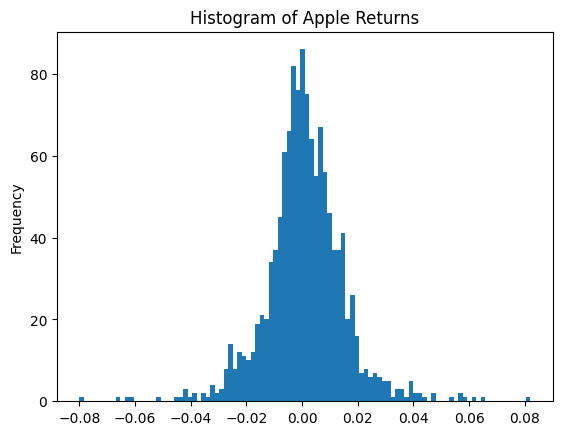

In [26]:
aapl['Returns'].plot(kind='hist', bins=100, title="Histogram of Apple Returns")

### Question: multiple series different axis

<Axes: ylabel='S&P Close'>

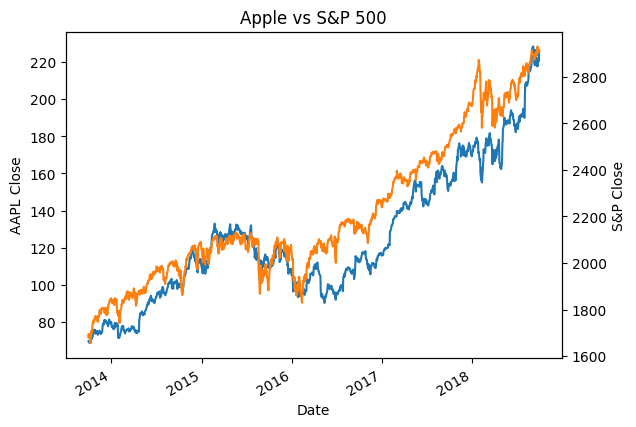

In [36]:
aapl['Close'].plot(title="Apple vs S&P 500", ylabel="AAPL Close")
# plt.show() #separates the charts
sp500['Close'].plot(secondary_y=True, ylabel="S&P Close")

In [40]:
sp500['Returns'].describe()

count    1259.000000
mean        0.000467
std         0.007758
min        -0.040979
25%        -0.002826
50%         0.000489
75%         0.004560
max         0.039034
Name: Returns, dtype: float64

<Axes: >

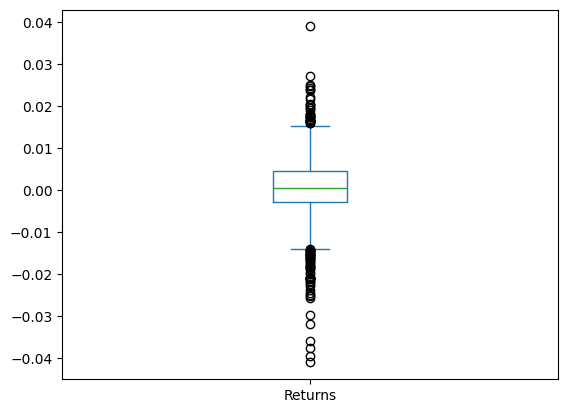

In [38]:
sp500['Returns'].plot(kind='box')
    # 1.5x IQR (75%-25% ranges) --> where cuts off for outliers

## Examples with Matplotlib

In [44]:
sp500.index

DatetimeIndex(['2013-09-30', '2013-10-01', '2013-10-02', '2013-10-03',
               '2013-10-04', '2013-10-07', '2013-10-08', '2013-10-09',
               '2013-10-10', '2013-10-11',
               ...
               '2018-09-17', '2018-09-18', '2018-09-19', '2018-09-20',
               '2018-09-21', '2018-09-24', '2018-09-25', '2018-09-26',
               '2018-09-27', '2018-09-28'],
              dtype='datetime64[ns]', name='Date', length=1260, freq=None)

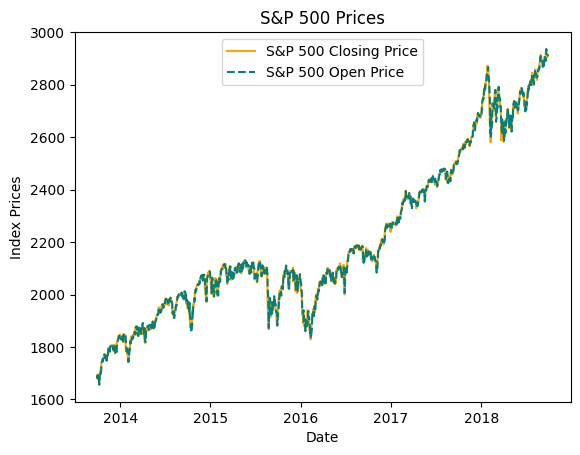

In [92]:

#plotting the series
# sp500['Close'].plot()
plt.plot(sp500.index, sp500['Close'], 'orange') #index in this case are the dates
plt.plot(sp500.index, sp500['Open'], 'teal', linestyle='--')

#customizing the settings of the graph (legend, title, labels, etc.)
plt.title("S&P 500 Prices")
plt.xlabel("Date")
plt.ylabel("Index Prices")
plt.legend(['S&P 500 Closing Price','S&P 500 Open Price'], loc='upper center')
plt.savefig("Output/chart demo.jpg")
plt.show() #stop with this chart and show it


## Matplotlib - Annotated Charts

In [60]:
sp500['Close'].describe()

count    1260.000000
mean     2208.579183
std       311.699505
min      1655.449951
25%      1985.515015
50%      2101.265014
75%      2434.777527
max      2930.750000
Name: Close, dtype: float64

In [64]:
maxPrice = sp500['Close'].max()  #2930.750000
maxPriceDate = sp500['Close'].idxmax()  #index of the max
#sp500[sp500['Close']==maxPrice].index

In [89]:
xText = maxPriceDate - pd.DateOffset(years=3)
yText = maxPrice - 0.05 * maxPrice

Text(2015-09-20 00:00:00, 2784.2125, 'Max Price')

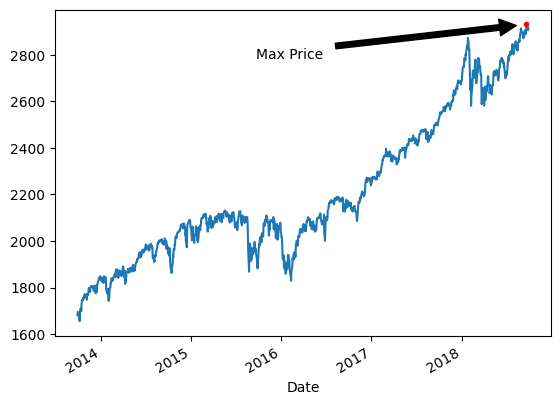

In [90]:
sp500['Close'].plot()
plt.plot(maxPriceDate, maxPrice, color='red', marker='.')
# plt.annotate("Max Price", xy=(maxPriceDate, maxPrice - 100)) 

#if you want to show an arrow between the text and the actual marker, use xytext
plt.annotate("Max Price", 
             xy=(maxPriceDate, maxPrice), 
             xytext=(xText,yText),
             arrowprops={'facecolor':'black', 'shrink':0.05}
            ) 

## Coffee break until 10:45 am EST

## Matplotlib - Multiple Subplots

`plt.subplot(x, y, z)`
- x = # of rows for the grid
- y = # of cols for the grid
- z = which graph # are you plotting right now

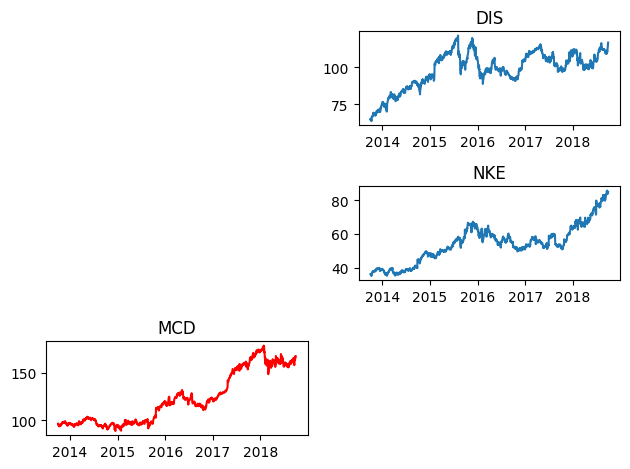

In [103]:
dis = pd.read_csv("StockData/dis.csv", parse_dates=['Date'], index_col=['Date'], date_format="%m/%d/%y")
wmt = pd.read_csv("StockData/wmt.csv", parse_dates=['Date'], index_col=['Date'], date_format="%m/%d/%y")
nke = pd.read_csv("StockData/nke.csv", parse_dates=['Date'], index_col=['Date'], date_format="%m/%d/%y")
mcd = pd.read_csv("StockData/mcd.csv", parse_dates=['Date'], index_col=['Date'], date_format="%m/%d/%y")

rows = 3
cols = 2

plt.subplot(rows, cols, 2)
plt.plot(dis.index, dis['Close'])
plt.title("DIS")

plt.subplot(rows, cols, 4)
plt.plot(nke.index, nke['Close'])
plt.title("NKE")

plt.subplot(rows, cols, 5)
plt.plot(mcd.index, mcd['Close'], 'red')
plt.title("MCD")
plt.tight_layout() #adds a bit of spacing/padding between the charts
plt.show()

#Challenge on assigment --> try for loop to automate all 6 graphs at once

## Seaborn Examples
https://seaborn.pydata.org/examples/index.html

In [109]:
sp500['Year'] = sp500.index.year      #sp500['Date'].dt.year
sp500['Quarter'] = sp500.index.quarter
sp500['Month'] = sp500.index.month
# sp500

<Axes: ylabel='Frequency'>

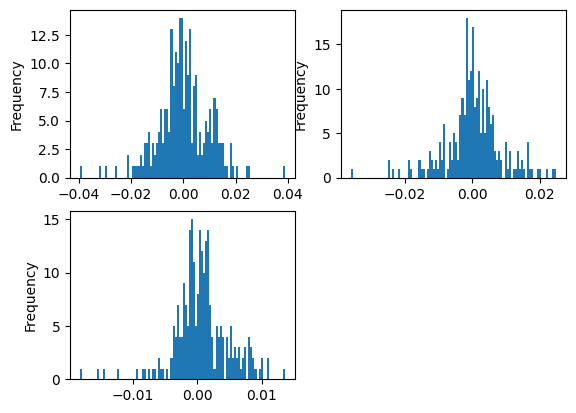

In [118]:
rows = 2
cols = 2

plt.subplot(rows, cols, 1)
sp500.loc['2015']['Returns'].plot(kind='hist', bins=100)

plt.subplot(rows, cols, 2)
sp500.loc['2016']['Returns'].plot(kind='hist', bins=100)

plt.subplot(rows, cols, 3)
sp500.loc['2017']['Returns'].plot(kind='hist', bins=100)

<Axes: xlabel='Month', ylabel='Returns'>

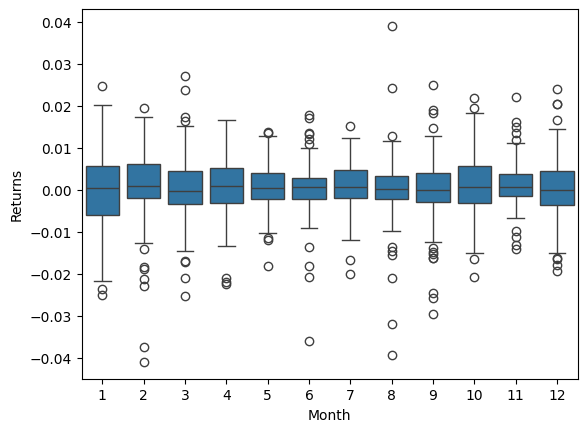

In [124]:
sns.boxplot(sp500, x='Month', y='Returns')

<Axes: xlabel='Year', ylabel='Returns'>

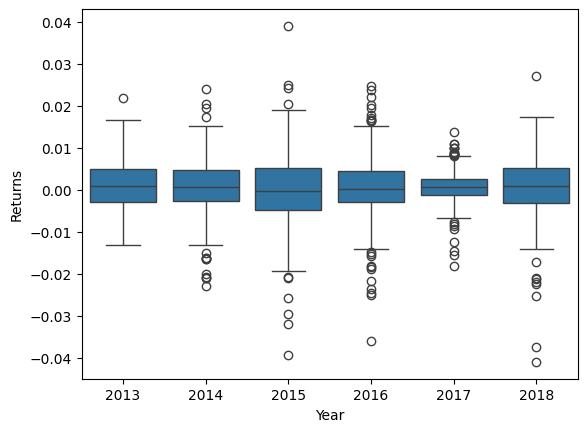

In [123]:
sns.boxplot(sp500, x='Year', y='Returns')

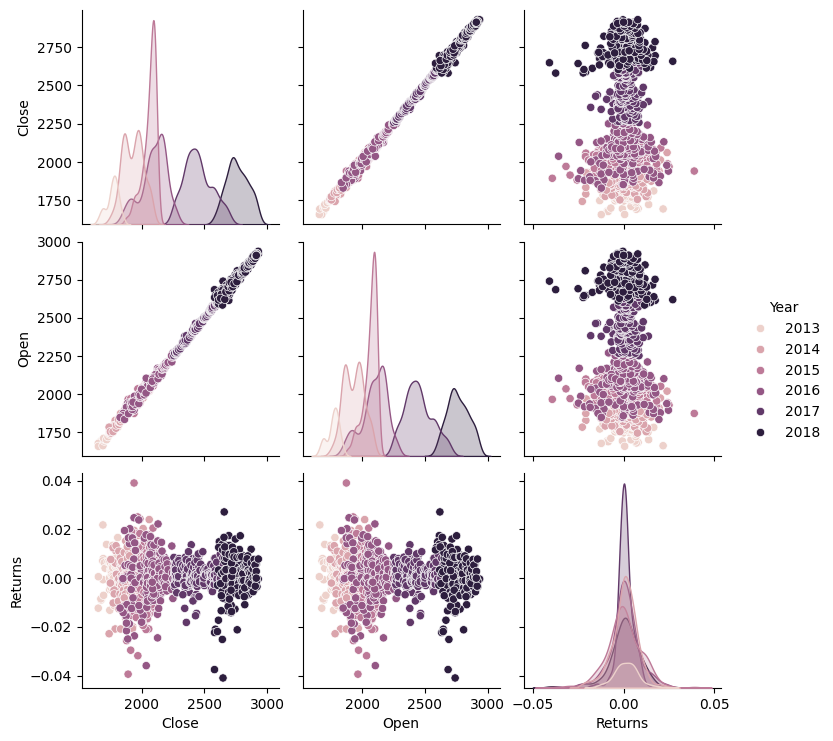

In [111]:
sns.pairplot(sp500[['Close','Open','Returns','Year']], hue='Year')
# sns.pairplot(sp500[['Close','Open','Returns','Year']])

In [129]:
# sns.heatmap(sp500.corr(), annot=True)
    #heatmap of correlations

In [125]:
sp500.corr()

Open      High       Low     Close  Adj Close    Volume  \
Open       1.000000  0.999542  0.999283  0.998797   0.998797 -0.109752   
High       0.999542  1.000000  0.999158  0.999370   0.999370 -0.102874   
Low        0.999283  0.999158  1.000000  0.999513   0.999513 -0.124338   
Close      0.998797  0.999370  0.999513  1.000000   1.000000 -0.115267   
Adj Close  0.998797  0.999370  0.999513  1.000000   1.000000 -0.115267   
Volume    -0.109752 -0.102874 -0.124338 -0.115267  -0.115267  1.000000   
Returns   -0.014998  0.005703  0.013842  0.031928   0.031928 -0.115006   
Year       0.914103  0.915642  0.911592  0.913799   0.913799  0.056244   
Quarter   -0.047871 -0.050601 -0.042638 -0.046560  -0.046560 -0.155441   
Month     -0.032844 -0.035536 -0.027622 -0.031797  -0.031797 -0.154754   

            Returns      Year   Quarter     Month  
Open      -0.014998  0.914103 -0.047871 -0.032844  
High       0.005703  0.915642 -0.050601 -0.035536  
Low        0.013842  0.911592 -0.042638 -0.027622  
Close      0.031928  0.913799 -0.046560 -0.031797  
Adj Close  0.031928  0.913799 -0.046560 -0.031797  
Volume    -0.115006  0.056244 -0.155441 -0.154754  
Returns    1.000000 -0.000331  0.027668  0.021531  
Year      -0.000331  1.000000 -0.231946 -0.225300  
Quarter    0.027668 -0.231946  1.000000  0.970955  
Month      0.021531 -0.225300  0.970955  1.000000

## Plotly Examples
https://plotly.com/python/plotly-express/

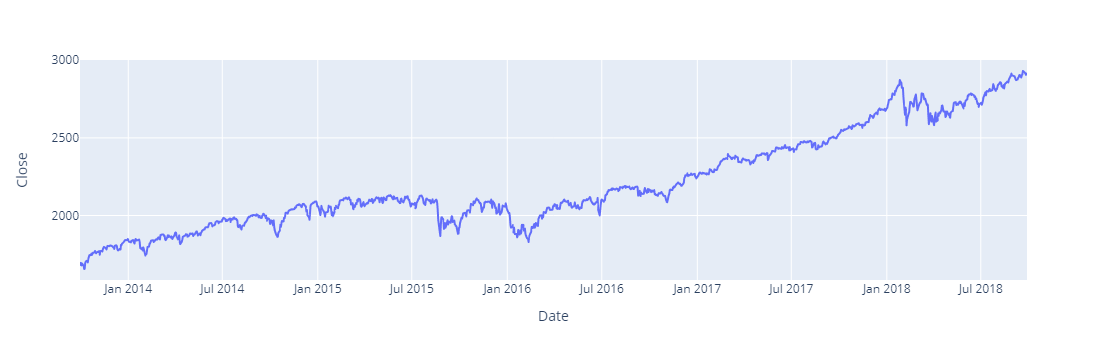

In [130]:
px.line(sp500, sp500.index, sp500['Close'])

In [133]:
aapl['Ticker']='AAPL'
dis['Ticker']='DIS'
mcd['Ticker']='MCD'
stockData = pd.concat([aapl, dis, mcd])
# stockData

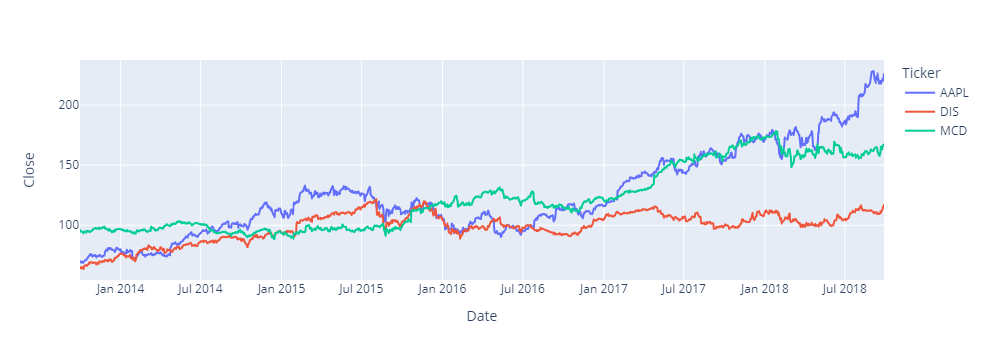

In [135]:
px.line(stockData, stockData.index, 'Close', color='Ticker')
        #color in plotly similar to "hue" in seaborn
        #breaks apart the chart into multiple series with different colors

In [138]:
fig = px.line(stockData, stockData.index, 'Close', color='Ticker')
# fig.show()
fig.write_html("Output/plotly demo.html")

## Lunch + working session until 1:20pm EST
- work on Part 1 of `Data Science Essentials - Visualization and Analysis Assignments v24.0`
- takeup of the challenge questions at 1:20pm EST
- my latest notes in the chat and I will also upload to github during lunch

## Take-up Visualization Assignment

### Challenge Question 1 - Plot min/max of all years

In [18]:
#aapl.loc['2017']['Adj Close']

In [ ]:
#Max price of just 2017
maxPrice = aapl.loc['2017']['Adj Close'].max()  
maxPriceDate = aapl.loc['2017']['Adj Close'].idxmax()
plt.plot(aapl.index, aapl['Adj Close'])
plt.plot(maxPriceDate, maxPrice, 'red',marker='o')
plt.annotate('High 2017',xy=(maxPriceDate, maxPrice + 0.05 * maxPrice))
plt.show()

In [27]:
#Challenge max for all years
years = list(aapl.index.year.unique())
years

[2013, 2014, 2015, 2016, 2017, 2018]

2013
2014
2015
2016
2017
2018


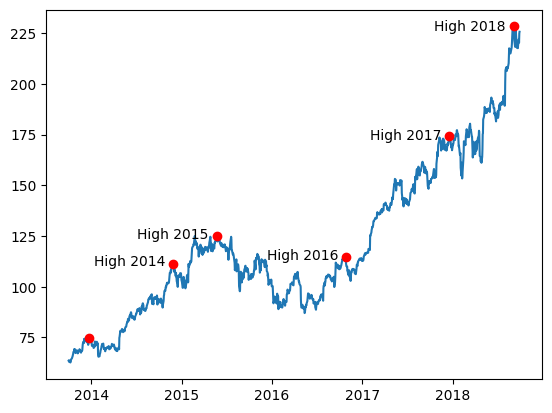

In [40]:
plt.plot(aapl.index, aapl['Adj Close']) #only need this once
for year in years:
    print(year)
    maxPrice = aapl.loc[str(year)]['Adj Close'].max()  
    maxPriceDate = aapl.loc[str(year)]['Adj Close'].idxmax()
    
    plt.plot(maxPriceDate, maxPrice, 'red',marker='o')
    plt.annotate(f'High {year}',xy=(maxPriceDate - pd.DateOffset(320), maxPrice - 0.01 * maxPrice))
plt.show()

### Challenge Question 2 - Plot subplots for 6 diff companies in a loop
- read_csv all the files at once inside of a loop
- create a second loop to do the subplots

In [48]:
fileNames = ['SP500','AAPL', 'AXP', 'BA', 'CSCO', 'CAT']
colors = ['red', 'blue', 'black', 'orange', 'green', 'yellow']
tables = []
for file in fileNames:
    df = pd.read_csv(f"StockData/{file}.csv", parse_dates=['Date'], index_col=['Date'], date_format="%m/%d/%y")
    tables.append(df)

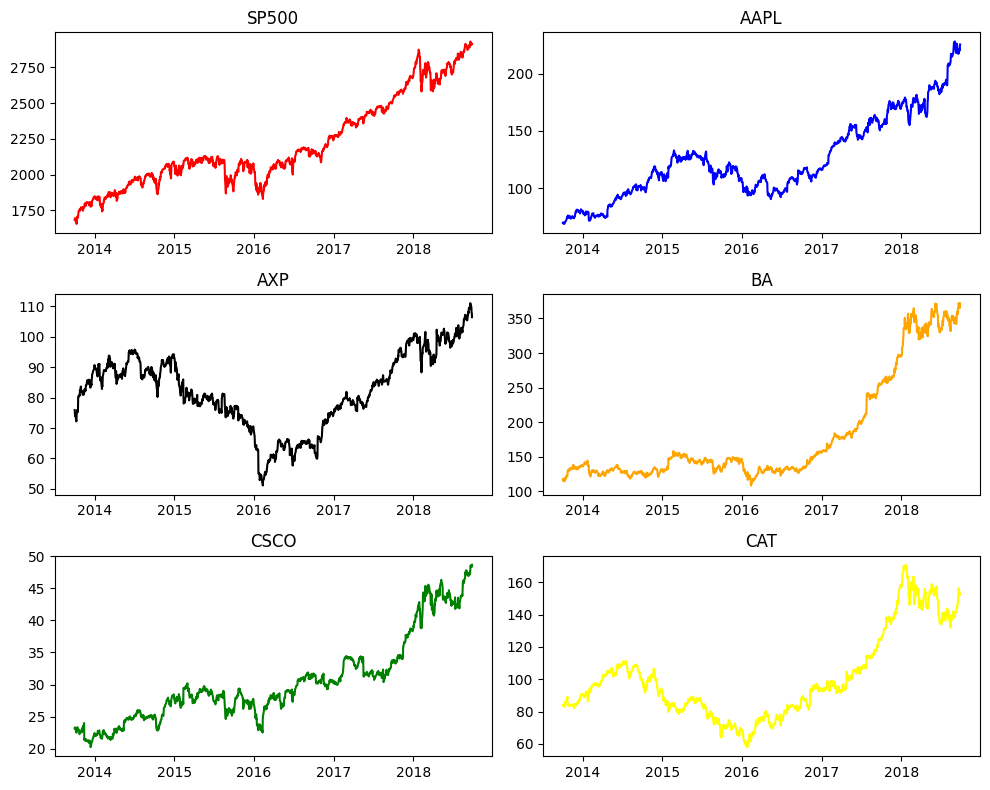

In [50]:
rows = 3
cols = 2
plt.figure(figsize=(10,8))
for idx, file in enumerate(fileNames):
    #idx = fileNames.index(file)
    df = tables[idx]
    plt.subplot(rows, cols, idx+1)
    plt.plot(df.index, df['Close'], colors[idx])
    plt.title(file)
plt.tight_layout()
plt.show()

## Coffee break until 2:20pm EST